In [1]:
import pandas as pd
import numpy as np

import missingno as msno

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import nn

In [2]:
data = pd.read_csv("weatherAUS.csv")
df = data.copy()
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


<AxesSubplot:>

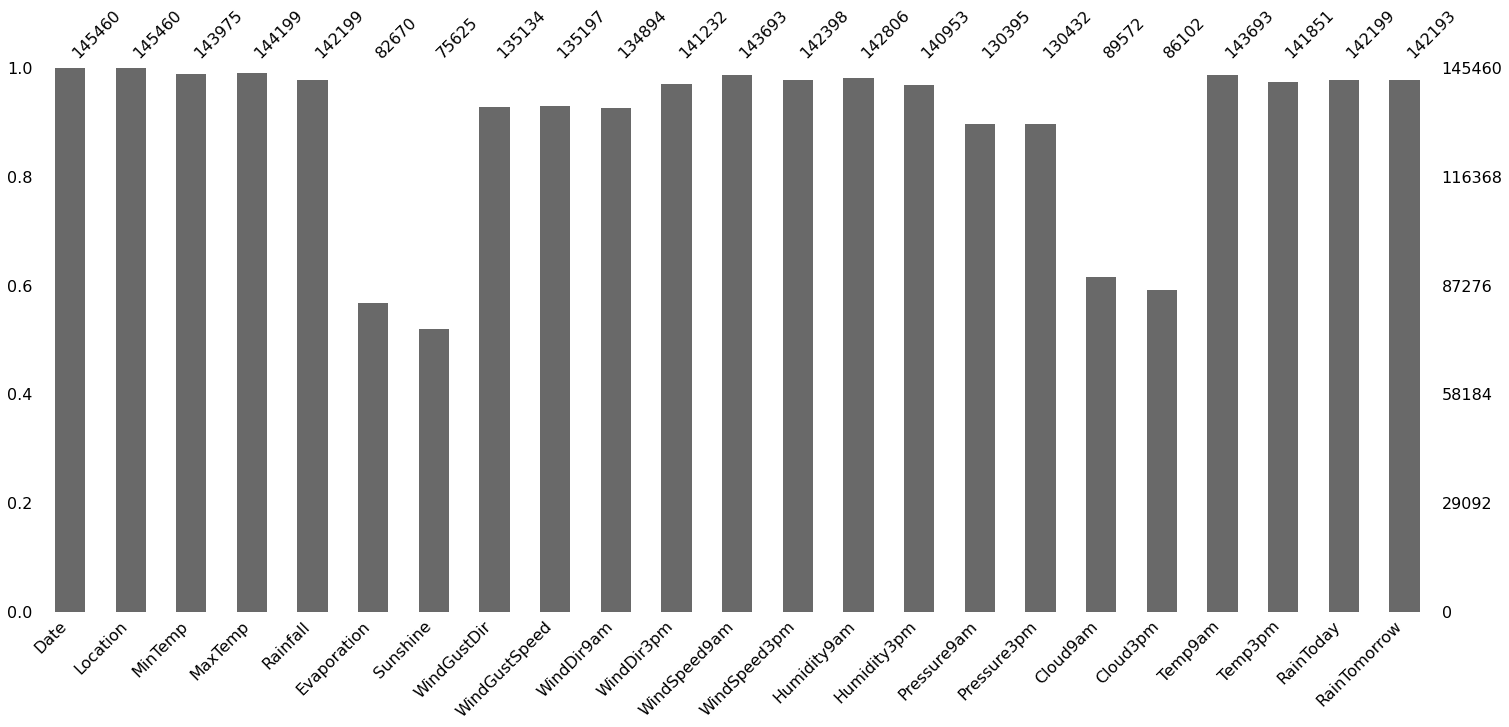

In [3]:
msno.bar(df)

In [4]:
#we drop these 4 coulms as they contain more than 40% missings
df.drop(['Evaporation','Sunshine',"Cloud9am","Cloud3pm"],axis=1,inplace=True)

<AxesSubplot:>

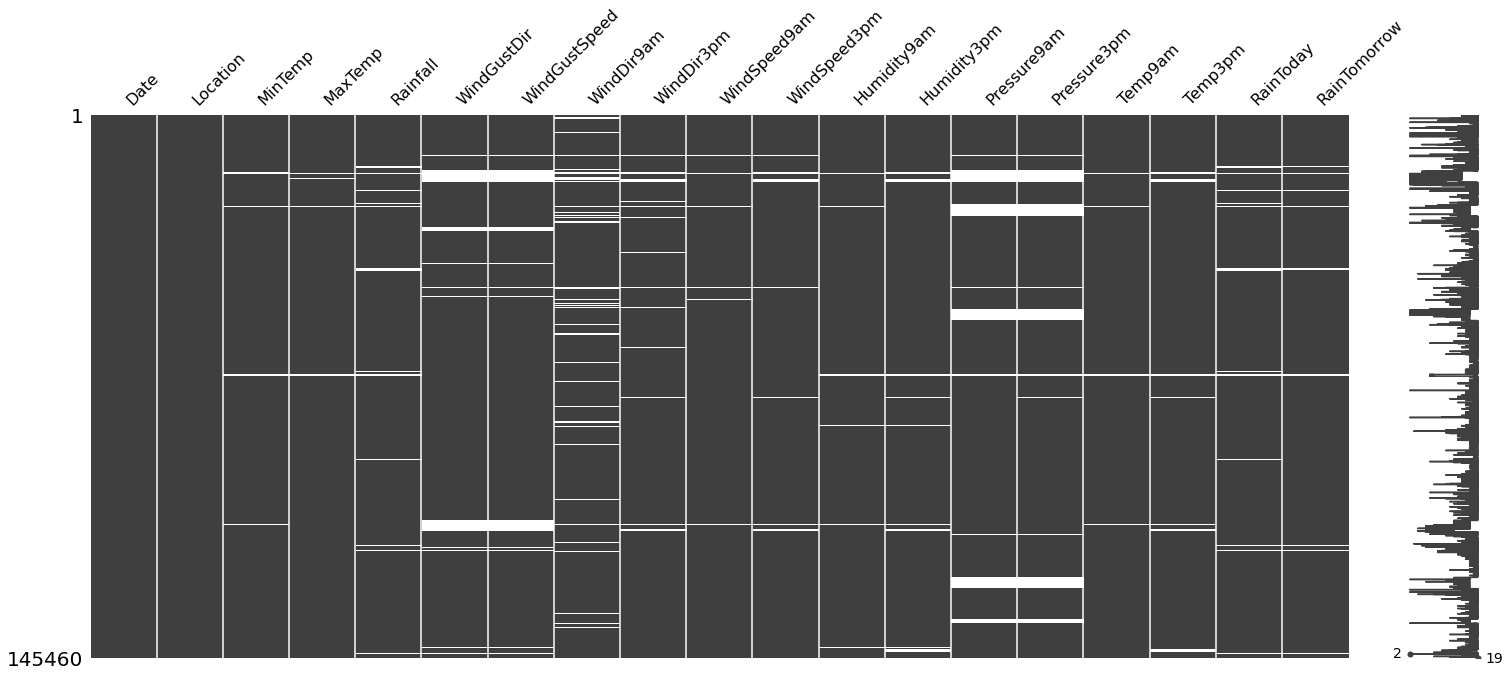

In [5]:
msno.matrix(df)

<AxesSubplot:>

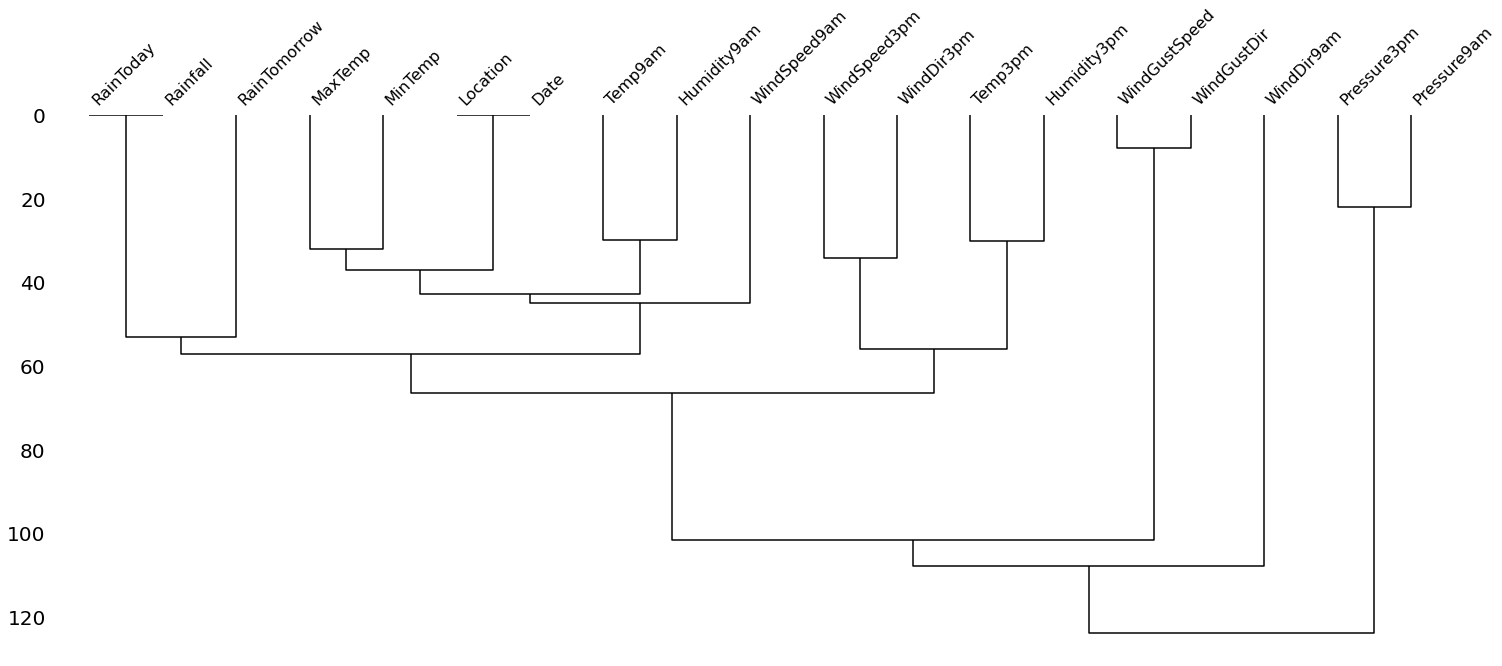

In [6]:
msno.dendrogram(df)

In [7]:
#this dendogram shows NA of which columns are relateable
#Link for msno:[https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009]

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           112925 non-null  object 
 1   Location       112925 non-null  object 
 2   MinTemp        112925 non-null  float64
 3   MaxTemp        112925 non-null  float64
 4   Rainfall       112925 non-null  float64
 5   WindGustDir    112925 non-null  object 
 6   WindGustSpeed  112925 non-null  float64
 7   WindDir9am     112925 non-null  object 
 8   WindDir3pm     112925 non-null  object 
 9   WindSpeed9am   112925 non-null  float64
 10  WindSpeed3pm   112925 non-null  float64
 11  Humidity9am    112925 non-null  float64
 12  Humidity3pm    112925 non-null  float64
 13  Pressure9am    112925 non-null  float64
 14  Pressure3pm    112925 non-null  float64
 15  Temp9am        112925 non-null  float64
 16  Temp3pm        112925 non-null  float64
 17  RainToday      112925 non-nul

In [10]:
y = df['RainTomorrow']
df_date = df[['Date']]
df_chr = df.drop(['RainTomorrow','Date'],axis=1).select_dtypes(exclude=np.number)
df_num = df.select_dtypes(include=np.number)

In [11]:
num_cols = df_num.columns


R_scaler = RobustScaler()
df_num_rs = R_scaler.fit(df_num).transform(df_num)
df_num_rs = pd.DataFrame(data = df_num_rs, columns = num_cols)

In [12]:
df_chr.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [13]:
df_chr = pd.get_dummies(df_chr,drop_first=True)
y= pd.get_dummies(y,drop_first=True)

In [14]:
df_date['Year'] = pd.to_numeric(df_date['Date'].str[:4])
df_date['Month'] = pd.to_numeric(df_date['Date'].str[5:7])
df_date['Day'] = pd.to_numeric(df_date['Date'].str[8:10])
df_date.head(2)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,Date,Year,Month,Day
0,2008-12-01,2008,12,1
1,2008-12-02,2008,12,2


In [15]:
df_date.drop(['Date'],axis=1,inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
date_cols = df_date.columns


R_scaler = RobustScaler()
df_date_rs = R_scaler.fit(df_date).transform(df_date)
df_date_rs = pd.DataFrame(data = df_date_rs, columns = date_cols)

In [17]:
df_chr.reset_index(inplace=True)

In [18]:
X = pd.concat([df_chr,df_num_rs,df_date_rs],axis=1)

In [19]:
X.shape

(112925, 105)

# Feature selection

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.0270464  0.00236576 0.0013695  0.00228738 0.00286437 0.00260435
 0.00254093 0.00211016 0.00284646 0.00206536 0.0028462  0.0029555
 0.00185225 0.00251158 0.00307391 0.0005294  0.00188763 0.002517
 0.00275975 0.00219924 0.00193055 0.00338327 0.00178573 0.00338283
 0.00313134 0.00272552 0.00235196 0.00332659 0.0028806  0.00381645
 0.00233079 0.00295645 0.0028363  0.0030695  0.00145192 0.00246889
 0.00077764 0.00264872 0.00354064 0.00324168 0.0027386  0.00349853
 0.00338302 0.00213595 0.00360561 0.00381115 0.00508308 0.00442836
 0.00439709 0.00457129 0.00510127 0.00545389 0.00458682 0.00470278
 0.00522829 0.00503397 0.00596012 0.00515869 0.00532493 0.0042975
 0.00353546 0.00637562 0.0046156  0.00508325 0.00485098 0.00526907
 0.00436579 0.00401122 0.0042124  0.00445012 0.00466249 0.00515889
 0.00495116 0.00463095 0.00416391 0.00415135 0.0049726  0.0047551
 0.00462545 0.00482527 0.00504862 0.00508638 0.00450901 0.00477322
 0.00455726 0.00432901 0.00536865 0.00538617 0.00482658 0.05564079


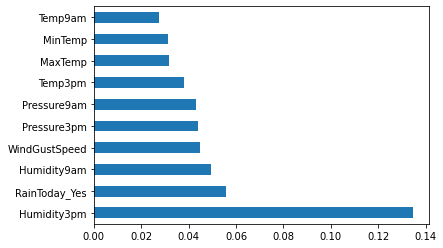

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
X.columns

Index(['index', 'Location_Albury', 'Location_AliceSprings',
       'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar',
       ...
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object', length=105)

In [22]:
X = X[['Humidity3pm','RainToday_Yes',"Humidity9am","WindGustSpeed",'Pressure9am','Pressure3pm',"Temp3pm","Temp9am","MinTemp","MaxTemp"]]

# Modelling

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify =y,random_state=13)

In [24]:
#coverting arrayes into torch
X_train=torch.from_numpy(X_train.values).float()
X_test=torch.from_numpy(X_test.values).float()
y_train=torch.from_numpy(y_train.values).float()
y_test=torch.from_numpy(y_test.values).float()

In [25]:
#creating a Tensor Datasets
train_data=TensorDataset(X_train , y_train)
test_data=TensorDataset(X_test , y_test)

In [26]:
#Creating a Data Loader
train_dataloader=DataLoader(train_data,batch_size=64,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=64,shuffle=True)

# Creating of NN

In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(len(X.columns),1000),
            nn.ReLU(),
            nn.Linear(1000,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,125),
            nn.ReLU(),
            nn.Linear(125,1),
            nn.Sigmoid()
            
        )
    def forward(self,x):
        return self.model(x)

In [28]:
model=NeuralNetwork()

In [29]:
learning_rate=0.001
batch_size=32
epochs=20

In [30]:
loss_fn=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.float())
        y=y.float()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [53]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.float())
            y=y.float()
            test_loss += loss_fn(pred, y).item()
            correct += (pred.ge(0.5) == y).type(torch.float).sum().item()


    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [54]:
for t in range(epochs):
    print(f"Epoch {t+1}\n---")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
---
loss: 0.334732  [    0/84693]
loss: 0.330769  [ 6400/84693]
loss: 0.329219  [12800/84693]
loss: 0.389848  [19200/84693]
loss: 0.444934  [25600/84693]
loss: 0.309678  [32000/84693]
loss: 0.482547  [38400/84693]
loss: 0.376625  [44800/84693]
loss: 0.323585  [51200/84693]
loss: 0.292662  [57600/84693]
loss: 0.410854  [64000/84693]
loss: 0.244940  [70400/84693]
loss: 0.512382  [76800/84693]
loss: 0.430893  [83200/84693]
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.005467 

Epoch 2
---
loss: 0.362042  [    0/84693]
loss: 0.337399  [ 6400/84693]
loss: 0.305444  [12800/84693]
loss: 0.312646  [19200/84693]
loss: 0.453314  [25600/84693]
loss: 0.347006  [32000/84693]
loss: 0.279045  [38400/84693]
loss: 0.350244  [44800/84693]
loss: 0.384939  [51200/84693]
loss: 0.298241  [57600/84693]
loss: 0.306886  [64000/84693]
loss: 0.337782  [70400/84693]
loss: 0.352717  [76800/84693]
loss: 0.317391  [83200/84693]
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.005457 

Epoch 3
---
loss: 0.289634  [   

loss: 0.350340  [ 6400/84693]
loss: 0.434148  [12800/84693]
loss: 0.329073  [19200/84693]
loss: 0.310602  [25600/84693]
loss: 0.429344  [32000/84693]
loss: 0.498672  [38400/84693]
loss: 0.422233  [44800/84693]
loss: 0.291853  [51200/84693]
loss: 0.530621  [57600/84693]
loss: 0.307857  [64000/84693]
loss: 0.493101  [70400/84693]
loss: 0.355609  [76800/84693]
loss: 0.311444  [83200/84693]
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.005456 

Epoch 19
---
loss: 0.258152  [    0/84693]
loss: 0.388586  [ 6400/84693]
loss: 0.354693  [12800/84693]
loss: 0.342855  [19200/84693]
loss: 0.360346  [25600/84693]
loss: 0.277567  [32000/84693]
loss: 0.318002  [38400/84693]
loss: 0.297409  [44800/84693]
loss: 0.429749  [51200/84693]
loss: 0.346987  [57600/84693]
loss: 0.376570  [64000/84693]
loss: 0.236468  [70400/84693]
loss: 0.308214  [76800/84693]
loss: 0.426573  [83200/84693]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.005450 

Epoch 20
---
loss: 0.254656  [    0/84693]
loss: 0.383220  [ 6400/84693]
